In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("✅ Dataset Loaded Successfully!")
print(df.head())

✅ Dataset Loaded Successfully!
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [ ]:
print("\nClass Distribution:")
print(df['target'].value_counts())


Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


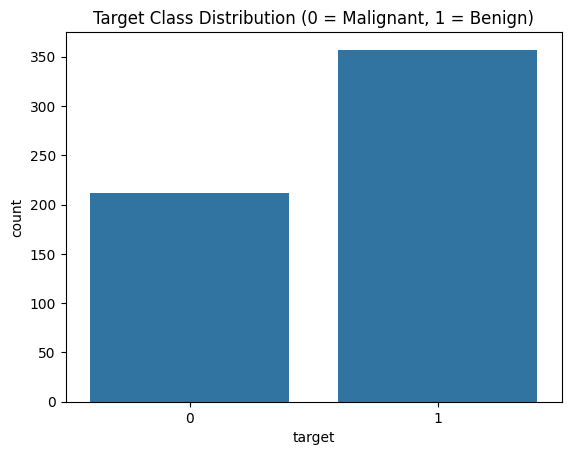

In [ ]:

# Visualize class balance
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

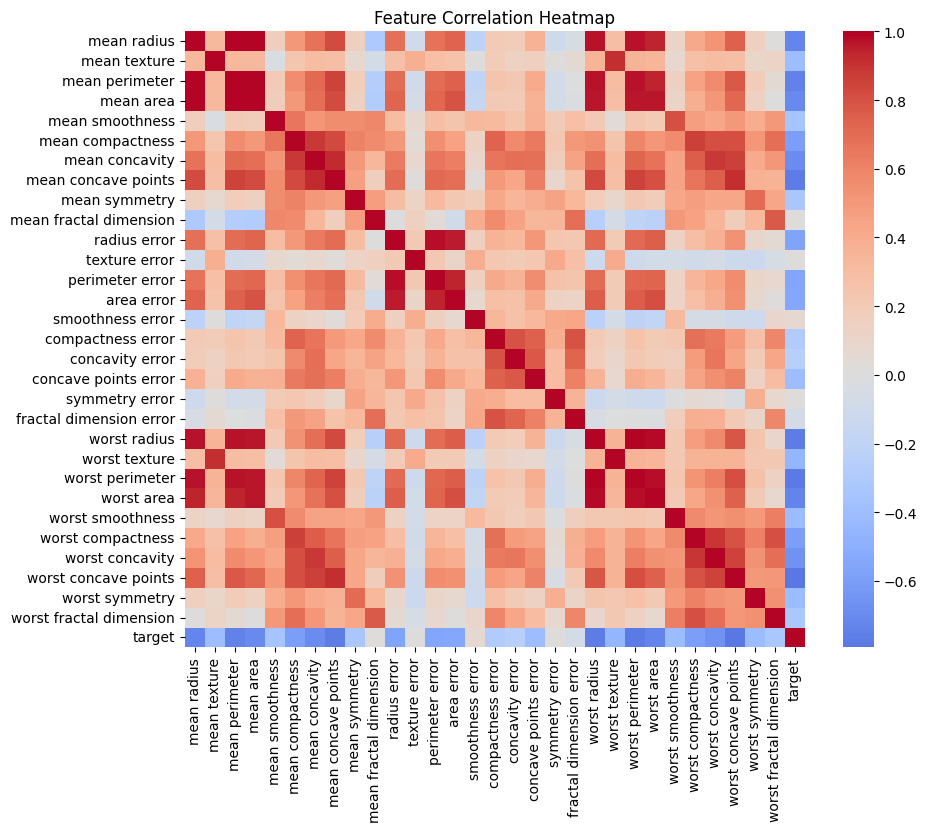

In [ ]:

# Correlation heatmap (top features)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data Preprocessing Completed!")



✅ Data Preprocessing Completed!


In [ ]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid → binary output between 0 and 1
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6898 - loss: 0.6000 - val_accuracy: 0.9011 - val_loss: 0.4073
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9211 - loss: 0.3447 - val_accuracy: 0.9231 - val_loss: 0.2796
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9151 - loss: 0.2484 - val_accuracy: 0.9451 - val_loss: 0.2194
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9397 - loss: 0.1864 - val_accuracy: 0.9560 - val_loss: 0.1821
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9493 - loss: 0.1436 - val_accuracy: 0.9560 - val_loss: 0.1575
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9621 - loss: 0.1212 - val_accuracy: 0.9451 - val_loss: 0.1405
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.1022 - val_accuracy: 0.9560 - val_loss: 0.1285
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9703 - loss: 0.1192 - val_accuracy: 0.9560 - val_loss

In [ ]:

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n✅ Test Accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9707 - loss: 0.0782

✅ Test Accuracy: 97.37%


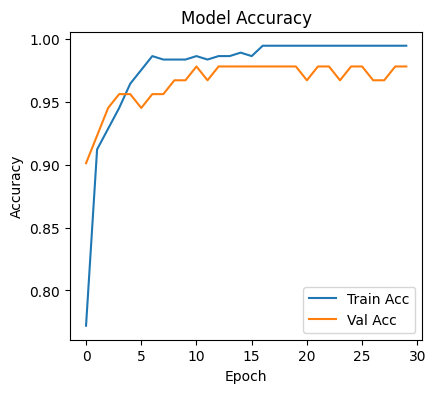

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


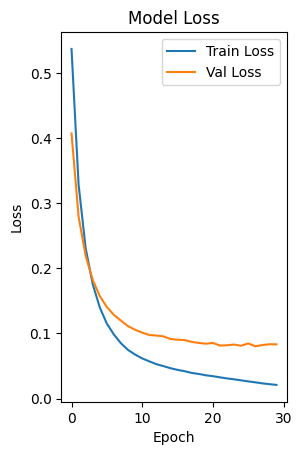

In [ ]:

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
new_sample = X_test.iloc[0]                   # take one sample from test set
new_sample_scaled = scaler.transform([new_sample])  # scale it same as training data

# Predict
prediction_prob = model.predict(new_sample_scaled)[0][0]
prediction_class = int(prediction_prob > 0.5)

print("\n🧩 Single Sample Prediction:")
print(f"Predicted Class: {prediction_class} (0 = Malignant, 1 = Benign)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

🧩 Single Sample Prediction:
Predicted Class: 1 (0 = Malignant, 1 = Benign)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive (6).zip'
extract_path = '/tmp/extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract all files from the zip archive
+with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files to identify the CSV file
print("Extracted files:")
print(os.listdir(extract_path))

Extracted files:
['train', 'test']


In [4]:
import os

print("Train folder contents:")
print(os.listdir(os.path.join(extract_path, 'train')))

print("\nTest folder contents:")
print(os.listdir(os.path.join(extract_path, 'test')))


Train folder contents:
['cats', 'dogs']

Test folder contents:
['cats', 'dogs']


In [5]:

import tensorflow as tf
import os

train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    label_mode='categorical'  # 'int' for numeric labels, 'categorical' for one-hot
)

Found 557 files belonging to 2 classes.


In [7]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='categorical'
)

Found 140 files belonging to 2 classes.


normalize the image

In [10]:
train_data = train_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: cats and dogs
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # ✅ define input layer explicitly
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: cats and dogs
])


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
history = model.fit(train_data, validation_data=test_data, epochs=10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4851 - loss: 0.8352 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5507 - loss: 0.6906 - val_accuracy: 0.5214 - val_loss: 0.7032
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5569 - loss: 0.6729 - val_accuracy: 0.5429 - val_loss: 0.6946
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6041 - loss: 0.6623 - val_accuracy: 0.6143 - val_loss: 0.6726
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6881 - loss: 0.5937 - val_accuracy: 0.5071 - val_loss: 0.7550
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6020 - loss: 0.6650 - val_accuracy: 0.6071 - val_loss: 0.7076
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7646 - loss: 0.4898 - val_accuracy: 0.6143 - val_loss: 0.6642
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7999 - loss: 0.4429 - val_accuracy: 0.6429 - val_loss:

In [15]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.7188 - loss: 0.8816
Test accuracy: 0.66


In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Stop if no improvement in 3 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Save the best model automatically
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9465 - loss: 0.1955 - val_accuracy: 0.6429 - val_loss: 0.9598
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9467 - loss: 0.1431 - val_accuracy: 0.6714 - val_loss: 1.1576
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9674 - loss: 0.0931 - val_accuracy: 0.6143 - val_loss: 1.4036
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9800 - loss: 0.0709 - val_accuracy: 0.6286 - val_loss: 1.4941


In [17]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

train_data_aug = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))

In [18]:
history = model.fit(train_data_aug, validation_data=test_data, epochs=20)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7033 - loss: 0.6210 - val_accuracy: 0.6929 - val_loss: 0.7231
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7164 - loss: 0.5777 - val_accuracy: 0.6857 - val_loss: 0.6672
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7117 - loss: 0.5599 - val_accuracy: 0.6571 - val_loss: 0.7496
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7404 - loss: 0.5608 - val_accuracy: 0.6071 - val_loss: 0.8953
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6473 - loss: 0.6557 - val_accuracy: 0.6500 - val_loss: 0.6698
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7138 - loss: 0.5628 - val_accuracy: 0.6500 - val_loss: 0.8090
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7739 - loss: 0.4854 - val_accuracy: 0.6929 - val_loss: 0.7769
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7012 - loss: 0.5292 - val_accuracy: 0.6929 - val_loss: